In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [3]:
spotify = pd.read_csv("Spotify_data.csv")

In [4]:
spotify.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


## Как отличаются предпочтения по типу контента (подкасты или музыка) в разных возрастных группах?

In [5]:
df = spotify
df['preferred_listening_content'].unique()

array(['Podcast', 'Music'], dtype=object)

In [ ]:
df['index'] = df.index

In [57]:
cat_typeOrder = CategoricalDtype(categories=["6-12","12-20","20-35","35-60","60+"], ordered=True)
df["Age"] =  df["Age"].astype(cat_typeOrder)

/var/folders/vy/dqjs80ms1kg43qy8g1wp0x1m0000gn/T/ipykernel_36499/3928581723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] =  df["Age"].astype(cat_typeOrder)


In [63]:
# посмотрим на численность групп
content_age = df.pivot_table(
    values='index',
    index='Age', 
    columns= 'preferred_listening_content',
    aggfunc= 'count',
    fill_value=0)
content_age
# вывод: самая многочисленная - 20-35, в группе 60+ представлен только 1 респондент

preferred_listening_content,Music,Podcast
Age,,
6-12,1,2
12-20,26,35
20-35,243,61
35-60,9,12
60+,1,0


In [62]:
content_age = pd.crosstab(df.Age, df.preferred_listening_content, normalize='index')
content_age = content_age*100
content_age.round(2)

preferred_listening_content,Music,Podcast
Age,,
6-12,33.33,66.67
12-20,42.62,57.38
20-35,79.93,20.07
35-60,42.86,57.14
60+,100.00,0.00


<Axes: title={'center': 'Доля предпочтений разного контента по возрастам (%)'}, ylabel='Age'>

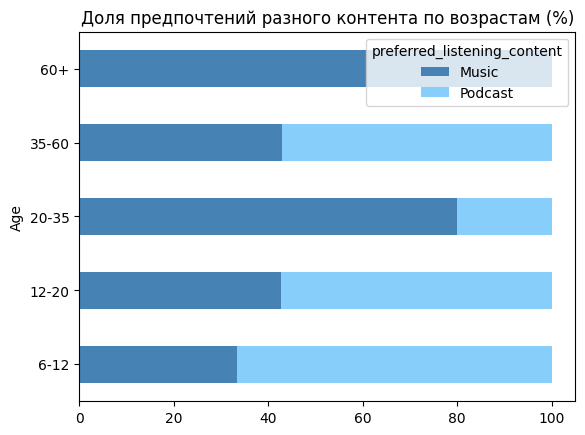

In [60]:
content_age.plot( 
    kind = 'barh', 
    stacked = True, 
    title = 'Доля предпочтений разного контента по возрастам (%)',
    color = ['steelblue', 'lightskyblue'])

## Вывод
1. Предпочтение подкастов не представлено только в самой старшей группе (60+), в остальных есть предпочтения как музыки, так и подкастов.
2. В возрастной группе 20-35 преобладает предпочтние музыки, тогда как в остальных - доля респондентов, предпочитающих подкасты музыке больше.
3. Стоит помнить о неравномерности групп: самая многочисленная - 20-35, в группе 60+ представлен только 1 респондент, так что в целом сравнение групп не совсем корректно.

## Как отличаются предпочтения по типу контента (подкасты или музыка) у мужчин и женщин?

In [10]:
df.Gender.value_counts()

Female    391
Male      114
Others     15
Name: Gender, dtype: int64

In [11]:
cat_typeOrder = CategoricalDtype(categories=["Male","Female","Others"], ordered=True)
df["Gender"] =  df["Gender"].astype(cat_typeOrder)

In [12]:
content_gender_age = df.pivot_table(
    values='index',
    index='preferred_listening_content', 
    columns= 'Gender',
    aggfunc= 'count',
    fill_value=0)
content_gender_age

Gender,Male,Female,Others
preferred_listening_content,,,
Music,94,309,7
Podcast,20,82,8


In [13]:
content_gender_age_proportion = content_gender_age.div(content_gender_age.sum(axis=1), axis=0)
content_gender_age_proportion = content_gender_age_proportion * 100

<Axes: title={'center': 'Доля предпочтений разного контента по полу (%)'}, ylabel='preferred_listening_content'>

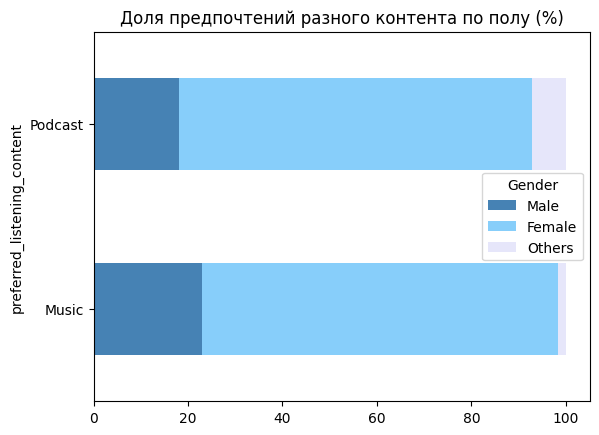

In [14]:
content_gender_age_proportion.plot( 
    kind = 'barh', 
    stacked = True, 
    title = 'Доля предпочтений разного контента по полу (%)',
    color = ['steelblue', 'lightskyblue','lavender'])

## Выводы: 
1. Всего женщин - 491, мужчин - 114, группы неравномерны.
2. По полу предпочтения распределены примерно одинаково, однако, немного больше группа мужин, предпочитающих подкасты. Женщины в одинаковой мере разделили предпочтения.

## Уберите тех, кто никогда не слушал подкасты. У оставшихся посмотрите на удовлетворенность разнообразием подкастов с учетом предпочитаемых жанров

In [15]:
df = df[df.pod_lis_frequency!="Never"]
df.shape

(390, 21)

In [16]:
cat_typeSat = CategoricalDtype(categories=["Very Dissatisfied","Dissatisfied","Ok","Satisfied","Very Satisfied"], ordered=True)
df["pod_variety_satisfaction"] =  df["pod_variety_satisfaction"].astype(cat_typeSat)


/var/folders/vy/dqjs80ms1kg43qy8g1wp0x1m0000gn/T/ipykernel_36499/2573762309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pod_variety_satisfaction"] =  df["pod_variety_satisfaction"].astype(cat_typeSat)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 518
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          390 non-null    object  
 1   Gender                       390 non-null    category
 2   spotify_usage_period         390 non-null    object  
 3   spotify_listening_device     390 non-null    object  
 4   spotify_subscription_plan    390 non-null    object  
 5   premium_sub_willingness      390 non-null    object  
 6   preffered_premium_plan       390 non-null    object  
 7   preferred_listening_content  390 non-null    object  
 8   fav_music_genre              390 non-null    object  
 9   music_time_slot              390 non-null    object  
 10  music_Influencial_mood       390 non-null    object  
 11  music_lis_frequency          390 non-null    object  
 12  music_expl_method            390 non-null    object  
 13  music

In [18]:
pod_sat = df.pivot_table(
    values='index',
    index='preferred_listening_content', 
    columns= 'Gender',
    aggfunc= 'count',
    fill_value=0)
content_gender_age

Gender,Male,Female,Others
preferred_listening_content,,,
Music,94,309,7
Podcast,20,82,8


In [19]:
df['pod_variety_satisfaction'].value_counts()

Ok                   176
Satisfied            150
Very Satisfied        46
Dissatisfied          17
Very Dissatisfied      1
Name: pod_variety_satisfaction, dtype: int64

In [20]:
df['fav_pod_genre'].value_counts()

Comedy                                              104
Lifestyle and Health                                101
Health and Fitness                                   77
Sports                                               50
None                                                 29
Food and cooking                                     15
Finance related and current affairs                   1
Educational                                           1
Self help                                             1
Novels                                                1
Political, informative, topics that interests me      1
Murder Mystery                                        1
Technology                                            1
Spiritual and devotional                              1
General knowledge                                     1
Dance and Relevant cases                              1
Informative stuff                                     1
Everything                                      

In [21]:
sat_variety_proportion = pd.crosstab(df.fav_pod_genre, df.pod_variety_satisfaction,values=df.index,aggfunc='count',normalize='index')

sat_variety_proportion = sat_variety_proportion*100

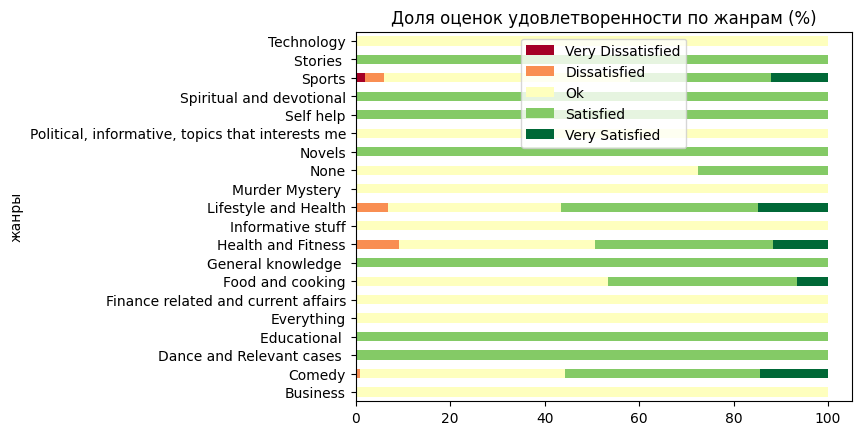

In [64]:
q=sat_variety_proportion.plot( 
    kind = 'barh', 
    stacked = True, 
    title = 'Доля оценок удовлетворенности по жанрам (%)',
    colormap='RdYlGn')
q.set(ylabel="жанры")
q.legend(loc=9)

## Выводы:
1. У большинства предпочтений жанров представлено по 1 оценке, группы предпочтиаемых жанров неравномерны.
2. В целом люди редко ставили низкую степень удовлетворенности (Dissatisfied / Very Dissatisfied).
3. Высшую оценку удовлетворенности разнообразием подкастов ставили респонденты, предпочитающие  Comedy, Lifestyle and Health, Health and Fitness, Sports - 4 самых популярных жанра.
4. Оценку Very Dissatisfied поставили только респонденты, предпочитающие Спорт.
5. В целом преобладают оценки "Ок" и "Удовлетворен".

## Сравните оценки рекомендации музыки для пользователей с разными жанровыми предпочтениями

In [23]:
df['fav_music_genre'].value_counts()

Melody              188
classical            75
Pop                  57
Rap                  49
Electronic/Dance     14
All                   3
Rock                  2
Kpop                  2
Name: fav_music_genre, dtype: int64

In [24]:
df['music_recc_rating'].value_counts()

3    143
4    124
5     64
2     51
1      8
Name: music_recc_rating, dtype: int64

In [66]:
# посчитаем среднюю оценку у каждого жанра
rating_genre = df.pivot_table(
    values='music_recc_rating',
    index='fav_music_genre', 
    aggfunc= ['mean','count'],
    fill_value=0)
# приведем в порядок названия столбцов
rating_genre.columns = ['_'.join(str(s). strip () for s in col if s) for col in rating_genre.columns]
rating_genre.reset_index(inplace= True)
rating_genre

,fav_music_genre,mean_music_recc_rating,count_music_recc_rating
0,All,4.000000,3
1,Electronic/Dance,3.928571,14
2,Kpop,5.000000,2
3,Melody,3.691489,188
4,Pop,3.736842,57
5,Rap,2.979592,49
6,Rock,2.500000,2
7,classical,2.933333,75


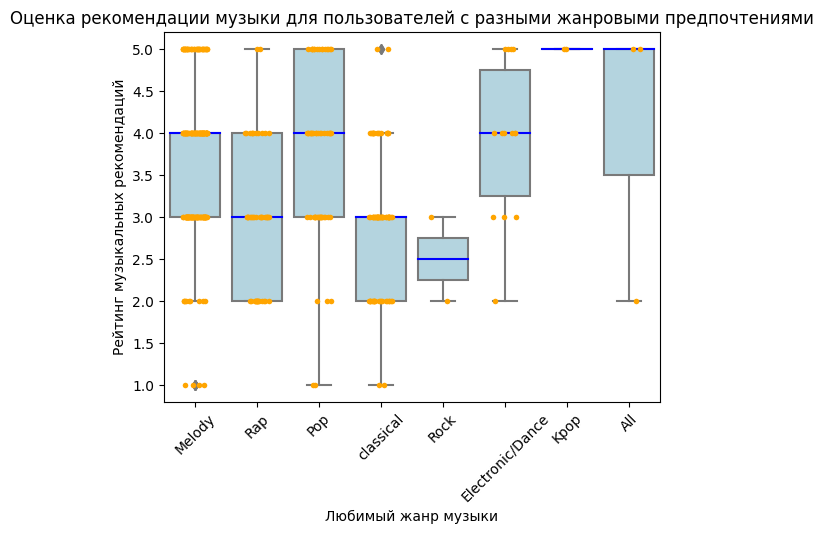

In [67]:
boxpl = sns.boxplot(x='fav_music_genre', y='music_recc_rating', data=df, color = "lightblue", 
                    medianprops={"color": "blue"})
boxpl = sns.stripplot(x = "fav_music_genre", y = "music_recc_rating", color="orange", jitter=0.2, size=4, data = df)
plt.title('Оценка рекомендации музыки для пользователей с разными жанровыми предпочтениями')
plt.xlabel('Любимый жанр музыки')
plt.ylabel('Рейтинг музыкальных рекомендаций')
plt.xticks(rotation=45)
plt.show()

## Выводы: оценки рекомендации музыки для пользователей с разными жанровыми предпочтениями
1. Самая многочисленная группа по жанровому предпочтению - Melody, распределение оценок рекомендаций нормально со средним 2.7
2. Самое низкое среднее у любителей рока - 2.5, однако эта группа малочисленна, в ней представлены ответы 2 респонденотов. 
3. Самая высокая средння оценка рекомендаций в группе с предпочтеними Kpop, но в ней также только 2 ответа.
4. Нормальное распределение оценок ркомендаций имеется в группе  Electronic/Dance (14 респондентов)
5. В более многочисленных группах (Rap-49 чел, Рор-57 чел), распредения смещенные: в первом случае смещено влево (в сторону низих оценок), во втором - вправо, в сторону высоких.